# TP: Introduction au deep learning avec `PyTorch`

`PyTorch` est un framework d'apprentissage automatique open source développé principalement par Facebook's AI Research Lab. Il est basé sur le langage de programmation Python et est connu pour sa flexibilité et sa facilité d'utilisation. `PyTorch` est largement utilisé pour la création et l'entraînement de réseaux de neurones, en particulier dans les domaines de la vision par ordinateur et du traitement du langage naturel.

Le coeur de `PyTorch` est écrit en `C++` pour des raisons de performances. Il utilise des bibliothèques mathématiques et d'algèbre linéaire bien établies, telles que `BLAS` (Basic Linear Algebra Subprograms) et `LAPACK` (Linear Algebra Package), pour accélérer les calculs numériques.

`PyTorch` fournit une interface Python conviviale pour interagir avec les fonctionnalités de bas niveau. Il utilise une approche orientée objet, ce qui signifie que les différentes fonctionnalités sont organisées en classes et objets. Les utilisateurs peuvent créer des instances de ces objets pour construire des modèles, définir des couches de réseau, définir des fonctions de perte, etc.

La bibliothèque `PyTorch` comprend également des modules pour le calcul automatique des gradients (**différentiation automatique**), qui est une fonctionnalité essentielle pour l'apprentissage automatique. Ces modules permettent de calculer automatiquement les dérivées des opérations effectuées sur les tenseurs.

## Jeu de données MNIST

MNIST (Modified National Institute of Standards and Technology) est une base de données largement utilisée dans le domaine de l'apprentissage automatique pour la reconnaissance de chiffres manuscrits. Il s'agit d'un ensemble de données contenant des images en niveaux de gris de chiffres manuscrits de 0 à 9.

La base de données MNIST est composée de deux parties principales :
- Le jeu d'apprentissage (training set) : Il comprend $60\,000$ exemples d'images de chiffres manuscrits, chacune étant une image de 28x28 pixels. Ces images sont associées à des étiquettes (labels) qui indiquent le chiffre correspondant (de 0 à 9).
- Le jeu de test (test set) : Il comprend $10\,000$ exemples supplémentaires d'images de chiffres manuscrits, également de taille 28x28 pixels. Les images de test sont utilisées pour évaluer les performances des modèles d'apprentissage automatique entraînés sur le jeu d'apprentissage.

La base de données MNIST est souvent utilisée comme un point de départ pour les tâches de classification d'images et pour l'évaluation des algorithmes d'apprentissage automatique. De nombreux chercheurs et développeurs utilisent MNIST pour tester de nouvelles architectures de réseaux de neurones et de nouvelles techniques d'apprentissage.

En raison de sa simplicité et de sa taille relativement petite, MNIST est devenu un jeu de données standard pour la communauté de l'apprentissage automatique. Il est souvent utilisé pour illustrer des concepts tels que la préparation des données, la classification, la rétropropagation, l'optimisation et la régularisation.

In [1]:
import numpy as np
import torch

### Chargement des données

Le module `torchvision.datasets` est une composante du module `PyTorch` spécialisée dans le chargement et la gestion de jeux de données populaires: MNIST, CIFAR-10, ImageNet, etc.

La classe principale dans `torchvision.datasets` est Dataset, qui définit l'interface de base pour les jeux de données. Les classes spécifiques à chaque jeu de données héritent de cette classe et la personnalisent en fonction des caractéristiques spécifiques du jeu de données. Par exemple, `MNIST` est une sous-classe de `Dataset` et voici un appel standard: 
```python
from torchvision import datasets
mnist_train = datasets.MNIST('data', train=True, download=True)
```
Une fois l'instance du jeu de données créée, vous pouvez accéder aux exemples de données et à leurs étiquettes à l'aide d'indexing (opérateur `[]`).

- Créer un objet `mnist_train` de la classe `datasets.MNIST` (chargement des données).
- Déterminer le type des éléments puis afficher quelques images en indiquant les labels associés.
- Faire de même pour le dataset de test: `mnist_test`.

### Solution

In [2]:
from torchvision import datasets
mnist_train = datasets.MNIST('data', train=True, download=True)

In [3]:
image, label = mnist_train[0]

In [4]:
print(image)
print(label)

<PIL.Image.Image image mode=L size=28x28 at 0x7F746E1FE0C0>
5


`PIL.Image.Image` fait référence à la classe principale de la bibliothèque Python `PIL` (Python Imaging Library) ou de sa version améliorée, appelée `Pillow`. Cette classe représente une image dans PIL/Pillow. 
On peut visualiser l'image via la fonction `imshow` de `matplotlib.pyplot`.

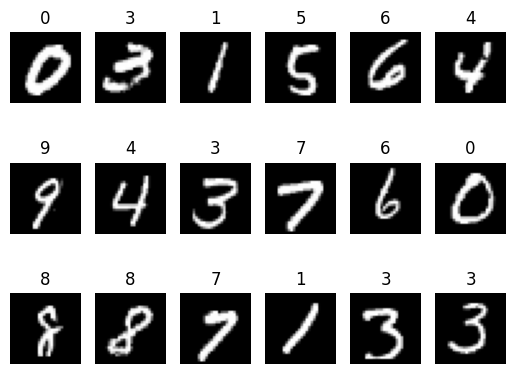

In [12]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=6, nrows=3)
for ax in axs.flatten():
    idx = torch.randint(len(mnist_train), size=(1,)).item()
    image, label = mnist_train[idx]
    ax.imshow(image, cmap="gray")
    ax.set_axis_off()
    ax.set_title(label)

### Transformation des images 

- A partir de `mnist_train` et des champs `data` et `targets`, créer un tensor `x_train` de shape 1x28x28 dont les données sont normalisées dans $[0,1]$ (0 pour un pixel blanc et 1 pour un pixel noir, il faut donc diviser par 255) et un tensor `y_train`. La première dimension (qui semble inutile) est nécessaire car les images en `PyTorch` sont manipulables sous le format `[channels, height, width]`, une image en couleur a 3 canaux R-G-B.
- Faire de même un `x_test` et `y_test` à partir de `mnist_test`.

**Remarque**:
Le module `transforms` du package `torchvision` fournit une collection de transformations couramment utilisées pour prétraiter les images de manière à les adapter aux besoins spécifiques de l'apprentissage automatique, tels que le redimensionnement, le recadrage, la normalisation, etc. 
On peut utiliser la fonction `ToTensor` pour convertir une image du dataset `mnist_train` en un tensor `PyTorch` et faire un appel de `datasets.MNIST` avec l'option `transform` pour obtenir directement les données sous la forme de tensors. 

Dans la suite on travaille avec ces données `x_train`, `y_train`, `x_test` et `y_test`.

### Solution

In [5]:
x_train = mnist_train.data.reshape((-1,1,28,28)) / 255 # mise en forme nb image ,1 car 1 seule couleur, dimx,dimy
print("shape: ", x_train.shape)
print("valeur min: ", x_train.min())
print("valeur max: ", x_train.max())
y_train = mnist_train.targets 
y_train # les labels

shape:  torch.Size([60000, 1, 28, 28])
valeur min:  tensor(0.)
valeur max:  tensor(1.)


tensor([5, 0, 4,  ..., 5, 6, 8])

In [6]:
mnist_test = datasets.MNIST('data', train=False, download=True)
x_test = mnist_test.data.reshape((-1,1,28,28)) / 255
y_test = mnist_test.targets
print(y_test.shape)

torch.Size([10000])


### Question: Exploration du dataset  

- Parcourir les deux datasets pour déterminer la proportion des différents labels présents. Avant toute modélisation il est important de voir si les données sont homogènes: c'est à dire correctement réparties dans le train set et dans le test set. 

### Solution

In [16]:
print(torch.bincount(y_train, minlength=10))
print(torch.bincount(y_test, minlength=10))

tensor([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949])
tensor([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009])


<Axes: xlabel='label', ylabel='prop'>

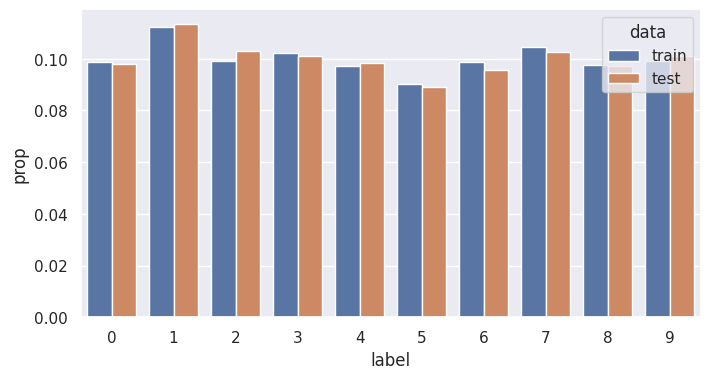

In [17]:
import pandas as pd
import seaborn as sns
sns.set_theme()

# Number of classes
num_labels = 10

y_counts = pd.DataFrame({
    'data': np.array(['train'] * num_labels + ['test'] * num_labels),
    'label': np.tile(np.arange(num_labels), 2),
    'prop': np.hstack([np.bincount(y_train) / len(y_train), 
                       np.bincount(y_test) / len(y_test)])
})

fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(x='label', y='prop', hue='data', data=y_counts, ax=ax)

## Un premier modèle: régression softmax

Dans cette première partie, nous n'allons pas utiliser le fait que nos données $x$ sont des images. En effet, chaque image $x$ est une matrice $p\times p = 28\times 28$ ($x=(x_{ij})$) avec une structure de voisinage spécifique. Mais ici, nous traitons chaque image $x$ comme un vecteur de taille $784$ ($x = (x_{j})$) et nous ignorons la structure de voisinage.

Nous souhaitons classer ces images ou, de manière équivalente, prédire le chiffre $k$ variant dans ${0, \ldots, 9}$ qu'elles représentent.
Un modèle simple permettant de le faire est la régression softmax (ou régression logistique multinomiale).


L'idée est de produire un score pour chaque image d'entrée $x$ en utilisant un modèle linéaire simple.
Pour cela, nous supposons que l'appartenance à une classe $k$ (correspondant au chiffre $k$) peut être exprimée par une somme pondérée des intensités de pixels, avec des poids $W_{k, 1}, \ldots, W_{k, 784}$ et un biais (ou intercept) $b_k$ qui capture une variabilité indépendante de l'entrée :
$$
    \text{score}_k(x) = \sum_{j=1}^{784} W_{k, j} x_j + b_k,
$$
Ces scores sont parfois appelés "logits" dans la communauté de l'apprentissage profond.
Ensuite, nous utilisons la fonction softmax pour convertir les scores en probabilités prédites $p_k=\mathbb{P}(y=k|x)$ :
$$
    \forall k =0,\ldots,9,\quad p_k(x) = \text{softmax}(\text{score}_k(x)) = \frac{\exp(\text{score}_k(x))}{\sum_{\ell =0}^{9}\exp(\text{score}_{\ell}(x))}.
$$

### Module `torch.nn`

`torch.nn` est un module de `PyTorch` qui fournit des outils et des classes pour construire et entraîner des réseaux de neurones. Il fournit des blocs de construction pour définir les différentes couches et opérations nécessaires dans un réseau de neurones, ainsi que des fonctions d'activation, des fonctions de coût et d'autres fonctionnalités liées à l'apprentissage automatique.

Voici quelques éléments clés de `torch.nn`:

- Modules et couches: variété de modules et de couches pré-définis tels que `Linear`, `Conv2d`, `RNN`, `BatchNorm`, etc. Ces modules encapsulent des opérations spécifiques et sont utilisés pour construire des architectures de réseaux de neurones complexes.

- Fonctions d'activation: `ReLU`, `Sigmoid`, `Tanh`, etc., qui peuvent être appliquées aux sorties des couches pour introduire des non-linéarités dans le modèle.

- Fonctions de coût: `CrossEntropyLoss`, `MSELoss`, etc., qui sont utilisées pour évaluer la performance du modèle et guider l'apprentissage.

- Optimiseurs: `SGD`, `Adam`, `RMSprop`, etc., qui sont utilisés pour ajuster les poids du modèle pendant l'entraînement.

- Définition des réseaux de neurones personnalisés: on peut définir des réseaux de neurones personnalisés en créant des classes héritant de `torch.nn.Module`. Cela permet de définir des architectures complexes en combinant différentes couches et en définissant la logique de propagation avant (forward pass) à l'intérieur de la classe.

Pour créer rapidement et facilement des architectures de réseaux de neurones séquentiels, on peut utiliser le module `nn.Sequential`: il suffit de définir l'architecture d'un modèle en spécifiant simplement les couches dans l'ordre dans lequel elles doivent être appliquées. Cela permet de définit un modèle simple sans écrire de classe personnalisée héritant de `nn.Module`.

### Définition du modèle 

- En utilisant les modules `nn.Sequential`, `nn.Flatten` et `nn.Linear` définir un objet `model_linear` qui code la fonction $\text{score}_k: [0,1]^{784} \to \mathbf{R}^{10}$. En fait cette fonction sera appelée pour un ensemble d'images...

### Solution

In [7]:
import torch.nn as nn
#Flatten on erase les 28*28 et linear de 28*28 vers 10 (nb de 0 a 9)
model_linear = nn.Sequential(
    nn.Flatten(),
    nn.Linear(28*28, 10), 
    # nn.Softmax(dim=1)  attention si on met cette couche on doit modifier le critère de loss dans la suite
)

In [9]:
model_linear

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=10, bias=True)
)

In [8]:
output = model_linear(x_train)
print(output.shape)
print(y_train.shape)

torch.Size([60000, 10])
torch.Size([60000])


Un code similaire à la main serait le suivant 
```python
class MyNetwork(nn.Module):
    def __init__(self, dim_in, dim_out):
        super(MyNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear = nn.Linear(dim_in, dim_out)
        #self.softmax = nn.Softmax(dim=1)
    
    def forward(self, x):
        x = self.flatten(x)
        x = self.linear(x)
        # x = self.softmax(x)
        return x

model_linear = MyNetwork(28*28, 10)
```


### Accès aux paramètres du modèle

- Utiliser la méthode `parameters()` sur l'objet `model_linear` et sur les objets `model_linear[i]` (i=0,1) pour accéder aux paramètres des différentes couches.

- Sauver les paramètres (l'état) du modèle dans un dictionnaire `state_init`. On utilisera la méthode `state_dict()` et on pourra recharger cet état initial via la méthode `load_state_dict()`.

### Solution

In [10]:
for p in model_linear.parameters():
    print(p)
    print(p.shape)

Parameter containing:
tensor([[-0.0182, -0.0100, -0.0157,  ..., -0.0079,  0.0234,  0.0068],
        [ 0.0073,  0.0186,  0.0337,  ..., -0.0336,  0.0345, -0.0197],
        [-0.0005,  0.0215,  0.0005,  ...,  0.0267,  0.0169, -0.0247],
        ...,
        [-0.0017, -0.0018,  0.0059,  ...,  0.0264,  0.0073,  0.0327],
        [-0.0140,  0.0270,  0.0087,  ..., -0.0012, -0.0280,  0.0214],
        [-0.0240, -0.0248, -0.0284,  ..., -0.0249, -0.0011, -0.0151]],
       requires_grad=True)
torch.Size([10, 784])
Parameter containing:
tensor([-0.0220,  0.0239, -0.0037,  0.0314, -0.0215, -0.0211,  0.0348,  0.0080,
         0.0312,  0.0241], requires_grad=True)
torch.Size([10])


In [11]:
for p in model_linear[0].parameters():
    print(p)

In [24]:
for p in model_linear[1].parameters():
    print(p)

Parameter containing:
tensor([[ 0.0211, -0.0200,  0.0071,  ...,  0.0031,  0.0063, -0.0275],
        [ 0.0050, -0.0186,  0.0233,  ..., -0.0066,  0.0110,  0.0109],
        [-0.0191, -0.0055, -0.0310,  ...,  0.0075, -0.0333,  0.0293],
        ...,
        [-0.0355, -0.0041, -0.0015,  ...,  0.0170,  0.0335,  0.0020],
        [ 0.0305, -0.0247, -0.0297,  ...,  0.0099,  0.0055, -0.0109],
        [-0.0064, -0.0199, -0.0054,  ..., -0.0328, -0.0228, -0.0337]],
       requires_grad=True)
Parameter containing:
tensor([ 0.0248, -0.0233, -0.0228, -0.0050,  0.0094, -0.0028, -0.0097,  0.0001,
        -0.0199,  0.0261], requires_grad=True)


In [25]:
import copy
state_init = copy.deepcopy(model_linear.state_dict())
state_init

OrderedDict([('1.weight',
              tensor([[ 0.0211, -0.0200,  0.0071,  ...,  0.0031,  0.0063, -0.0275],
                      [ 0.0050, -0.0186,  0.0233,  ..., -0.0066,  0.0110,  0.0109],
                      [-0.0191, -0.0055, -0.0310,  ...,  0.0075, -0.0333,  0.0293],
                      ...,
                      [-0.0355, -0.0041, -0.0015,  ...,  0.0170,  0.0335,  0.0020],
                      [ 0.0305, -0.0247, -0.0297,  ...,  0.0099,  0.0055, -0.0109],
                      [-0.0064, -0.0199, -0.0054,  ..., -0.0328, -0.0228, -0.0337]])),
             ('1.bias',
              tensor([ 0.0248, -0.0233, -0.0228, -0.0050,  0.0094, -0.0028, -0.0097,  0.0001,
                      -0.0199,  0.0261]))])

### Fonction de perte et descente de gradient

Pour entraîner les paramètres du modèle (le biais $b_k$ et les poids $W_{k, j}$ où $k=0, \ldots, 9$ et $j=1, \ldots, 784$), la fonction de perte considérée (mesure de qualité) est le logarithme négatif de la vraisemblance défini par l'entropie croisée entre le score $\text{score}(x)=(\text{score}_0(x),\dots,\text{score}_9(x))$ et le vrai label $y=(y_0,\dots,y_9)$:
$$
    \ell\big( \text{score}(x), y \big) = - \sum_{k=0}^{9} y_{k} \log\big( \text{softmax}(\text{score}_k(x)) \big).
$$

Pour ce premier modèle, nous optimisons par rapport aux paramètres $(\boldsymbol{W}, \boldsymbol{b})$ la perte totale $F(\boldsymbol{W}, \boldsymbol{b})$ sur l'ensemble d'entraînement $(x^i,y^i){1\le i \le n_{\text{train}}}$ exprimée comme
$$
    F(\boldsymbol{W}, \boldsymbol{b}) = \sum_{i=1}^{n_{\text{train}}} \ell \big(\text{score}(x^i), y^i \big) = - \sum_{i=1}^{n_{\text{train}}} \sum_{k=0}^{9} y^i_{k} \log(p_k(x^i)).
$$

- Utiliser `nn.CrossEntropyLoss` pour la perte $\ell$ sur le dataset `mnist_train`. 

- Créer un objet `optimizer` de type `optim.SGD` qui est une classe du module `torch.optim` de PyTorch qui implémente l'algorithme de descente de gradient stochastique (SGD) pour l'optimisation des paramètres d'un modèle. Le paramètre `lr` (learning rate) sera fixé à 0.005. 

- Faire une boucle de 10 itérations qui parcourt 10 fois tout le dataset (`x_train`,`y_train`). À chaque itération, vous réinitialisez les gradients avec `optimizer.zero_grad()`, calculez les prédictions du modèle (sur tout le dataset), calculez la perte, effectuez la rétropropagation du gradient avec `loss.backward()`, puis mettez à jour les paramètres avec `optimizer.step()`. Cela applique les mises à jour des paramètres basées sur le gradient calculé automatiquement (différentiation automatique aussi connue sous le nom de rétropropagation du gradient).

- Une fois que le code fonctionne, passer à 200 epochs et tracer la loss, puis les accuracy (train et test) en fonction des epochs. 

### Solution

In [27]:
criterion = nn.CrossEntropyLoss()
# Attention, si vous avez ajouté une couche `nn.Softmax` à votre modèle il faut utiliser un autre critère (voir par exemple `nn.NLLLoss` negative log likelihood loss).

epochs = 10
for epoch in range(epochs):
    loss = criterion(model_linear(x_train), y_train) # ici on aura toujours le meme resultat car on compare le meme modeleavec les labels
    print(loss)

tensor(2.2553, grad_fn=<NllLossBackward0>)
tensor(2.2553, grad_fn=<NllLossBackward0>)
tensor(2.2553, grad_fn=<NllLossBackward0>)
tensor(2.2553, grad_fn=<NllLossBackward0>)
tensor(2.2553, grad_fn=<NllLossBackward0>)
tensor(2.2553, grad_fn=<NllLossBackward0>)
tensor(2.2553, grad_fn=<NllLossBackward0>)
tensor(2.2553, grad_fn=<NllLossBackward0>)
tensor(2.2553, grad_fn=<NllLossBackward0>)
tensor(2.2553, grad_fn=<NllLossBackward0>)


In [28]:
from tqdm import tqdm
import torch.optim as optim

model_linear.load_state_dict(copy.deepcopy(state_init))
optimizer = optim.SGD(model_linear.parameters(), lr=0.01) # lr = learning rate
# gradient descent 
loss_train, accuracy_train, accuracy_test = [], [], [] 

n_train = len(y_train)
n_test = len(y_test)

epochs = 200 # nombre iterations 
# equi a for epoch in range(epochs)
with tqdm(range(epochs), unit="epoch") as tepoch: # barre de progression 
    for epoch in tepoch:
        optimizer.zero_grad() # a clean up step for PyTorch
        scores = model_linear(x_train) # On calcul les score du modele lineaire
        loss = criterion(scores, y_train) # on calcule la perte 
        loss.backward()       # compute updates for each parameter
        optimizer.step()      # make the updates for each parameter
        
        loss_train.append(loss.item())
        correct = (scores.max(axis=1).indices.flatten() == y_train).sum().item()
        accuracy_train.append(correct / n_train)
        
        with torch.no_grad():
            correct = (model_linear(x_test).max(axis=1).indices.flatten() == y_test).sum().item()
            accuracy_test.append(correct / n_test)
        tepoch.set_postfix(loss=loss.item(), accuracy=accuracy_train[-1], accuracy_test=accuracy_test[-1])

100%|██████████| 200/200 [00:08<00:00, 22.51epoch/s, accuracy=0.805, accuracy_test=0.816, loss=1.18]


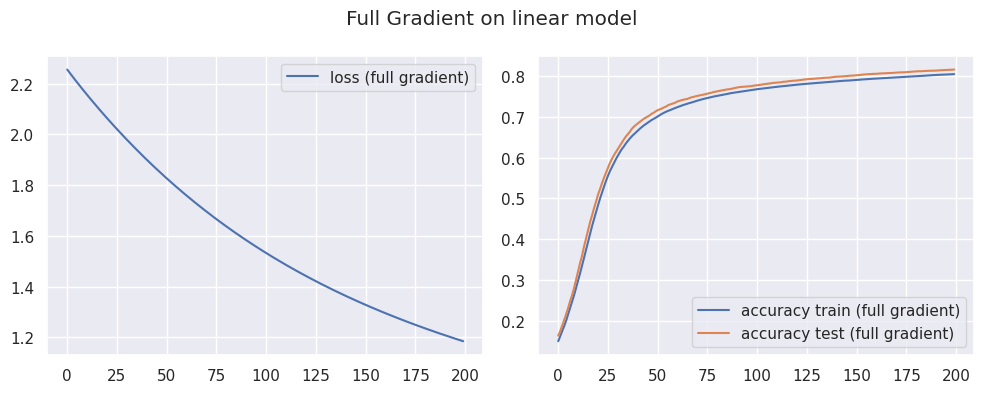

In [29]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4), layout="tight")
ax1.plot(np.arange(epochs), loss_train, label="loss (full gradient)")
ax2.plot(np.arange(epochs), accuracy_train, label="accuracy train (full gradient)")
ax2.plot(np.arange(epochs), accuracy_test, label="accuracy test (full gradient)")
ax1.legend()
ax2.legend()
fig.suptitle("Full Gradient on linear model")
plt.show()

### Optimisation stochastique, mini-batch

Ecrire une fonction pour faire l'apprentissage d'un modèle en implémentant un algorithme de descente de gradient stochastique. Adapter le code précédent pour écrire une fonction `training` qui prend pour arguments:
- `model` un modèle qui renvoie les scores 
- `optimizer` (qu'on suppose bien initialisé avec les `model.parameters()`)
- `epochs` le nombre d'epochs, par défaut à 100
- `batch_size` par défaut à 512

A chaque itération de `epoch` la procédure est la suivante: 
- on mélange le dataset (shuffle)
- on parcourt le dataset par bloc de taille `batch_size`
- sur chaque bloc on calcule le gradient et on met à jour les paramètres du modèle

A la fin d'une itération `epoch` on recalcule `accuracy_train` et `accuracy_test` sur les données. L'**accuracy calculée est la proportion d'images bien prédites**.

**Remarque:** en `PyTorch` on peut utiliser un `DataLoader` pour faire le travail de fournir les données en paquets de taille `batch_size` mais pour des raisons de pédagogie on refait le code à la main à partir de `x_train` et `y_train`.

### Solution

In [54]:
from tqdm import tqdm
def training(model, optimizer, epochs=100, batch_size=512): 
    criterion = nn.CrossEntropyLoss()
    loss_train, accuracy_train = [], [] 
    accuracy_test = []

    n_train = len(y_train)
    n_test = len(y_test)
    n_iters = n_train // batch_size
    with tqdm(range(epochs), unit="epoch") as tepoch:
        for epoch in tepoch:
            model.train
            running_loss = 0
            correct = 0
            # on mélange à chaque epoch par une permutation aléatoire
            idx = torch.randperm(n_train) # on melange
            for k in range(n_iters):
                batch = idx[k*batch_size: min((k+1)*batch_size, n_train)]
                x_batch, y_batch = x_train[batch], y_train[batch] 
                
                optimizer.zero_grad()
                scores = model(x_batch)
                loss = criterion(scores, y_batch)
                loss.backward()
                optimizer.step()
                running_loss += loss.item()

            running_loss /= n_iters
            loss_train.append(running_loss) 
            model.eval           
            with torch.no_grad():
                scores = model(x_train)
                correct = (scores.max(axis=1).indices.flatten() == y_train).sum().item()
                accuracy_train.append(correct / n_train)
                scores = model(x_test)
                correct = (scores.max(axis=1).indices.flatten() == y_test).sum().item()
                accuracy_test.append(correct / n_test)
            tepoch.set_postfix(loss=loss_train[-1], accuracy=accuracy_train[-1], accuracy_test=accuracy_test[-1])
    return { "loss": loss_train, "accuracy_train": accuracy_train, "accuracy_test": accuracy_test }

### Comparaison SGD et Adam

Utiliser la fonction précédente `training` pour comparer sur 200 epochs les 2 optimiseurs suivants:
- SGD Stochastic Gradient Descent classique avec learning rate de 0.005
- Adam (ADAptive Moment estimation) avec les paramètres par défaut

On tracera les loss en fonction des epochs ainsi que l'accurary score sur les données d'entrainement et sur les données d'apprentissage.

### Solution

In [55]:
# on définit le dictionnaire result pour stocker tous les résultats d'entrainement
result = {}

In [56]:
epochs = 200
result["softmax"] = { "epochs": np.arange(epochs) }

model_linear.load_state_dict(copy.deepcopy(state_init))
optimizer = optim.SGD(model_linear.parameters(), lr=0.005)
result["softmax"]["sgd"] = training(model_linear, optimizer, batch_size=512, epochs=epochs)

100%|██████████| 200/200 [00:25<00:00,  7.92epoch/s, accuracy=0.906, accuracy_test=0.912, loss=0.339]


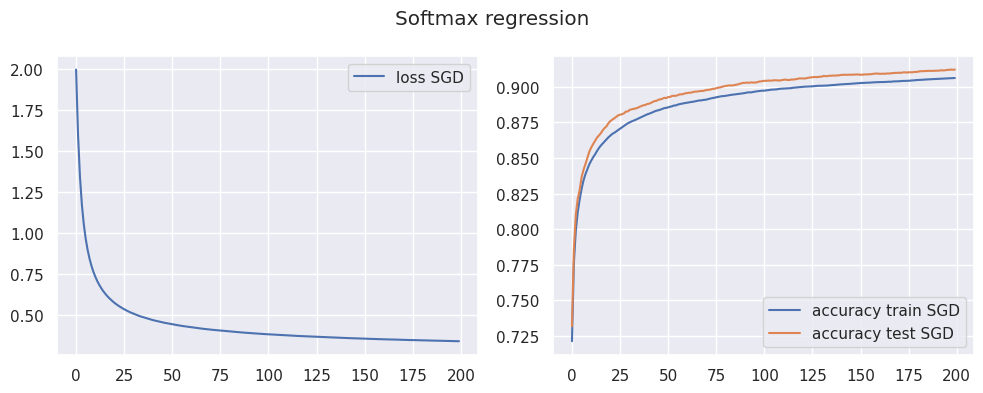

In [33]:
r = result["softmax"]
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4), layout="tight")
ax1.plot(r["epochs"], r["sgd"]["loss"], label="loss SGD")
ax2.plot(r["epochs"], r["sgd"]["accuracy_train"], label="accuracy train SGD")
ax2.plot(r["epochs"], r["sgd"]["accuracy_test"], label="accuracy test SGD")
ax1.legend()
ax2.legend()
fig.suptitle("Softmax regression")
plt.show()

In [57]:
model_linear.load_state_dict(copy.deepcopy(state_init))
optimizer = optim.Adam(model_linear.parameters())
result["softmax"]["adam"] = training(model_linear, optimizer, batch_size=512, epochs=epochs)

100%|██████████| 200/200 [00:31<00:00,  6.28epoch/s, accuracy=0.94, accuracy_test=0.928, loss=0.22]  


In [35]:
# pour simplifier les codes ultérieurs on définit une fonction... 
def plot_SGD_Adam(r, name): 
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4), layout="tight")
    ax1.plot(r["epochs"], r["sgd"]["loss"], label="loss SGD")
    ax1.plot(r["epochs"], r["adam"]["loss"], color="C2", label="loss Adam")
    ax2.plot(r["epochs"], r["sgd"]["accuracy_train"], label="accuracy train SGD")
    ax2.plot(r["epochs"], r["sgd"]["accuracy_test"], label="accuracy test SGD")
    ax2.plot(r["epochs"], r["adam"]["accuracy_train"], color="C2", label="accuracy train Adam")
    ax2.plot(r["epochs"], r["adam"]["accuracy_test"], color="C3", label="accuracy test Adam")
    ax1.legend()
    ax2.legend()
    fig.suptitle(name)
    plt.show()

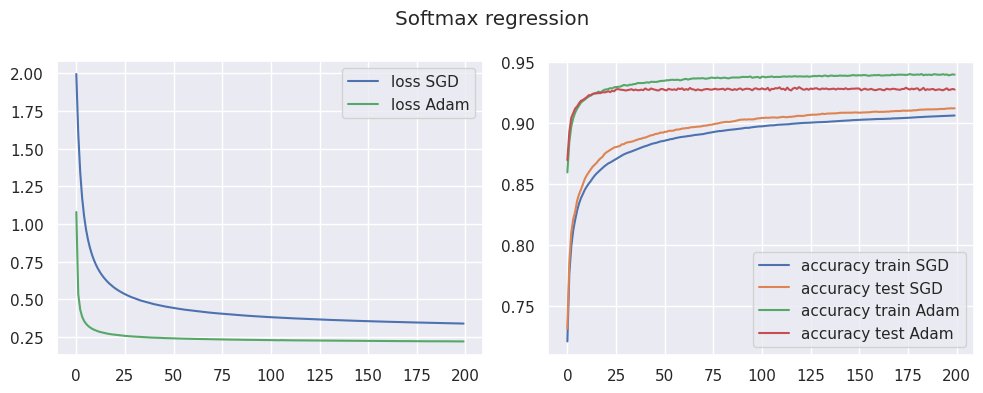

In [36]:
plot_SGD_Adam(result["softmax"], "Softmax regression")

### Changement de backend (si possible)

En informatique, le terme "backend" fait référence à la partie d'un logiciel ou d'un framework qui est responsable de l'exécution des opérations de bas niveau, telles que les calculs mathématiques, l'optimisation et l'interaction avec le matériel. En `PyTorch`, un backend est la composante responsable de l'exécution des opérations sur les tenseurs et de la gestion des calculs.
`PyTorch` propose plusieurs backends pour exécuter les opérations de bas niveau. Les principaux backends de `PyTorch` sont les suivants :

- CPU Backend: `"cpu"` les calculs sont effectués sur le processeur central (CPU) de l'ordinateur. Il offre une exécution efficace sur les CPUs modernes et est capable de tirer parti des optimisations spécifiques du matériel.

- CUDA Backend: `"cuda"` CUDA est une plateforme de calcul parallèle développée par NVIDIA. `PyTorch` utilise le backend CUDA pour exécuter des calculs sur les GPU NVIDIA. L'utilisation de GPU permet d'accélérer considérablement les calculs en parallélisant les opérations sur des milliers de coeurs de traitement. Cela rend `PyTorch` particulièrement efficace pour l'entraînement et l'inférence de modèles de réseaux de neurones profonds.

- Autres backends: `"mps"` pour le GPU intégré des puces M1/M2 chez Apple.

### Solution

In [38]:
# sur mon macbook pro M2 
mps_device = torch.device("mps")
x_train = x_train.to(mps_device)
y_train = y_train.to(mps_device)
x_test = x_test.to(mps_device)
y_test = y_test.to(mps_device)

epochs = 200
model_linear.load_state_dict(copy.deepcopy(state_init))
model_linear.to(mps_device)
optimizer = optim.Adam(model_linear.parameters())
training(model_linear, optimizer, batch_size=512, epochs=epochs);

100%|██████████| 200/200 [00:29<00:00,  6.80epoch/s, accuracy=0.939, accuracy_test=0.927, loss=0.221]


In [ ]:
# on revient sur le cpu pour la suite... 
cpu_device = torch.device("cpu")
x_train = x_train.to(cpu_device)
y_train = y_train.to(cpu_device)
x_test = x_test.to(cpu_device)
y_test = y_test.to(cpu_device)

## Feed-forward neural network (FFNN)

On ajoute une couche cachée (hidden layer) entre les entrées et la couche de sortie linéaire de 10 neurones. Cette couche cachée est une couche linéaire avec une fonction non-linéaire appliquée point par point. La fonction non-linéaire classique que l'on utilise ici est la fonction **Rectified Linear Unit**: $\text{ReLU}(x) = \max(x, 0)$. 

### Définition du modèle
- Définir un `model_ffnn` avec une seule couche cachée de 128 neurones. Cette couche a pour fonction d'activation un ReLU.
- Combien de paramètres possède cette fonction ? C'est la dimension dans lequel on doit résoudre le problème d'optimisation! 
- Reprendre les questions précédentes avec ce modèle.

### Solution

In [59]:
hidden_layer = 512

model_ffnn = nn.Sequential(
    nn.Flatten(),
    nn.Linear(28*28, hidden_layer), 
    nn.Dropout(p=0.1),
    nn.ReLU(),
    nn.Linear(hidden_layer, 10)
)
print(model_ffnn)

import copy
state_init_ffnn = copy.deepcopy(model_ffnn.state_dict())
state_init_ffnn

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=512, bias=True)
  (2): Dropout(p=0.1, inplace=False)
  (3): ReLU()
  (4): Linear(in_features=512, out_features=10, bias=True)
)


OrderedDict([('1.weight',
              tensor([[-0.0155,  0.0134, -0.0292,  ...,  0.0102,  0.0260, -0.0029],
                      [ 0.0013, -0.0321,  0.0298,  ...,  0.0352,  0.0104, -0.0163],
                      [-0.0185, -0.0052, -0.0195,  ...,  0.0356, -0.0173, -0.0081],
                      ...,
                      [-0.0185,  0.0203,  0.0126,  ..., -0.0298, -0.0071, -0.0289],
                      [ 0.0175,  0.0078, -0.0312,  ...,  0.0332,  0.0197, -0.0053],
                      [-0.0188,  0.0208, -0.0328,  ...,  0.0034,  0.0234, -0.0008]])),
             ('1.bias',
              tensor([-1.6675e-02, -1.6549e-02,  2.0915e-02,  2.7108e-02,  2.3921e-02,
                       2.9464e-02,  3.5336e-02,  1.1292e-02,  1.5624e-02,  1.4126e-02,
                      -9.1217e-03, -6.4848e-03, -3.5425e-02, -2.4829e-02,  3.3401e-02,
                       1.0697e-02,  8.4323e-03, -2.8346e-02, -2.4969e-02, -1.8859e-02,
                       1.7377e-02, -2.0168e-02, -7.7657e-03, -2.4806

In [50]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [51]:
count_parameters(model_ffnn)

407050

In [52]:
from torchinfo import summary
summary(model_ffnn)

Layer (type:depth-idx)                   Param #
Sequential                               --
├─Flatten: 1-1                           --
├─Linear: 1-2                            401,920
├─ReLU: 1-3                              --
├─Linear: 1-4                            5,130
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0

In [60]:
epochs = 200
result["ffnn"] = { "epochs": np.arange(epochs) } 

model_ffnn.load_state_dict(copy.deepcopy(state_init_ffnn))
optimizer = optim.SGD(model_ffnn.parameters(), lr=0.005)
result["ffnn"]["sgd"] = training(model_ffnn, optimizer, batch_size=512, epochs=epochs)

100%|██████████| 200/200 [04:52<00:00,  1.46s/epoch, accuracy=0.937, accuracy_test=0.936, loss=0.227]


In [61]:
model_ffnn.load_state_dict(copy.deepcopy(state_init_ffnn))
optimizer = optim.Adam(model_ffnn.parameters())
result["ffnn"]["adam"] = training(model_ffnn, optimizer, batch_size=512, epochs=epochs)

  8%|▊         | 17/200 [00:30<05:26,  1.78s/epoch, accuracy=0.997, accuracy_test=0.979, loss=0.0194]


KeyboardInterrupt: 

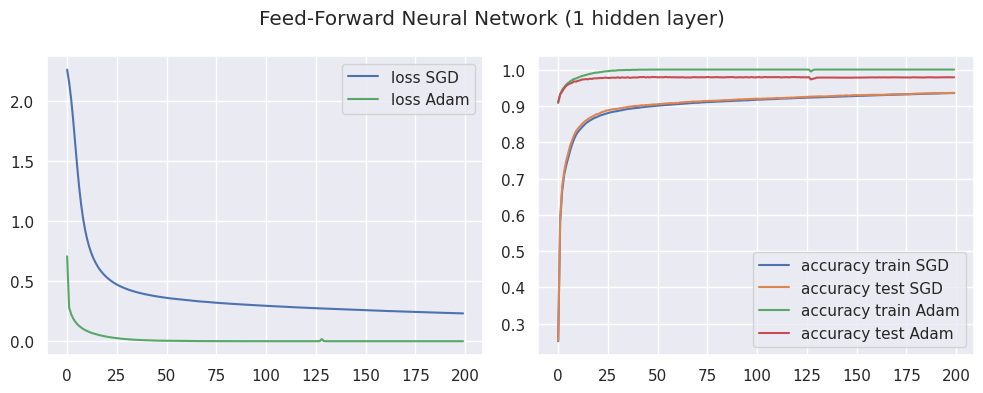

In [46]:
plot_SGD_Adam(result["ffnn"], "Feed-Forward Neural Network (1 hidden layer)")

### Visualisation des exemples mal classés

- Combien d'exemples sont mal classés par ce modèle après apprentissage et optimisation via Adam ? 
- Visualiser quelques exemples mal classés par ce modèle.

### Solution

In [47]:
scores_test = model_ffnn(x_test)
preds = scores_test.max(axis=1).indices.flatten()
correct = preds == y_test
num_uncorrect = torch.logical_not(correct).sum().item()
print("nombre d'exemples mal classés:", num_uncorrect)

nombre d'exemples mal classés: 211


In [81]:
!python --version


Python 3.12.0


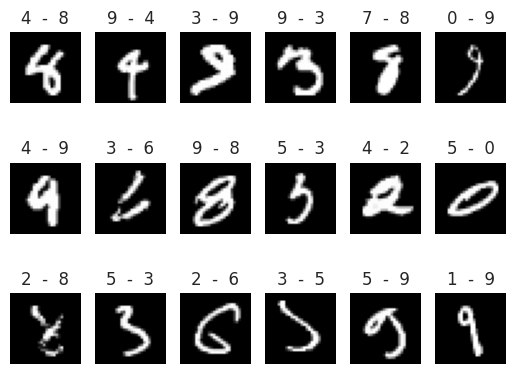

In [48]:
import matplotlib.pyplot as plt
from torchvision.transforms import ToPILImage
transform = ToPILImage()

fig, axs = plt.subplots(ncols=6, nrows=3)
for ax in axs.flatten():
    idx = torch.randint(num_uncorrect, size=(1,)).item()
    image = transform(x_test[torch.logical_not(correct)][idx])
    pred = preds[torch.logical_not(correct)][idx].numpy()
    label = y_test[torch.logical_not(correct)][idx].numpy()
    ax.imshow(image, cmap="gray")
    ax.set_axis_off()
    ax.set_title(np.array2string(pred) + "  -  " + np.array2string(label))

## Convolutional Neural Network (CNN)

Un réseau neuronal convolutif (Convolutional Neural Network ou CNN en anglais) est une architecture spécifique de réseau neuronal profond (deep learning) conçue principalement pour le traitement des données structurées en grille, telles que des images ou des séquences temporelles. Les CNN sont particulièrement performants dans les tâches de vision par ordinateur, comme la classification d'images, la détection d'objets et la segmentation sémantique.

La principale caractéristique d'un CNN réside dans son utilisation de couches de convolution. Les couches de convolution effectuent des opérations de convolution sur les entrées, en utilisant des filtres ou des noyaux appris pour extraire des caractéristiques spécifiques des données: les bords, les textures ou les motifs présents dans les données.

Une couche de convolution possède plusieurs hyperparamètres: 

En plus des couches de convolution, les CNN comprennent également d'autres types de couches:

- Couches de pooling : Les opérations de pooling, comme le max pooling, aident à préserver les caractéristiques les plus importantes tout en réduisant la quantité de calculs nécessaires et le nombre de paramètres.

- Couches de normalisation : Elles normalisent les activations des neurones pour améliorer la stabilité et accélérer l'apprentissage.

- Couches entièrement connectées : Elles sont situées à la fin du réseau et réalisent une classification ou une régression sur les caractéristiques extraites par les couches précédentes. Ces couches sont similaires aux couches d'un réseau neuronal traditionnel et utilisent généralement des fonctions d'activation non linéaires telles que ReLU (Rectified Linear Unit).

![](../img/cnn_view.png)

Voici par exemple des architectures "historiques", obtenues sur la page [wikipedia de LeNet](https://en.wikipedia.org/wiki/LeNet).
![](../img/cnn_examples.svg)

Ici on propose de tester une architecture basée sur: 
- `nn.Con2d`: https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html
- `nn.MaxPool2d`: https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html
- `nn.Linear`

### Définition du modèle 

Définir le réseau CNN suivant:
- Convolution avec 8 kernels de taille 5 (c'est à dire un carré 5x5), stride et padding à 0
- ReLU
- Max-Pooling 2x2
- Convolution avec 16 kernels de taille 5, stride et padding à 0
- ReLU
- Max-Pooling 2x2
- Une simple couche linéaire de sortie

### Solution

In [64]:
model_cnn = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=8, kernel_size=5), 
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),#12
    nn.Conv2d(8, 16, 5), 
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Flatten(),
    nn.Linear(16*4*4, 10), 
)
## dim 24*24 polilg 12*12 karnel :8 poling 4*4
import copy
state_init_cnn = copy.deepcopy(model_cnn.state_dict())
#state_init_cnn

In [65]:
count_parameters(model_cnn)

5994

In [66]:
# pour avoir des informations plus complètes sur l'architecture du réseau 
# on peut charger le module `torchinfo` (après installation)
from torchinfo import summary
summary(model_cnn, input_size=(512, 1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               [512, 10]                 --
├─Conv2d: 1-1                            [512, 8, 24, 24]          208
├─ReLU: 1-2                              [512, 8, 24, 24]          --
├─MaxPool2d: 1-3                         [512, 8, 12, 12]          --
├─Conv2d: 1-4                            [512, 16, 8, 8]           3,216
├─ReLU: 1-5                              [512, 16, 8, 8]           --
├─MaxPool2d: 1-6                         [512, 16, 4, 4]           --
├─Flatten: 1-7                           [512, 256]                --
├─Linear: 1-8                            [512, 10]                 2,570
Total params: 5,994
Trainable params: 5,994
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 168.04
Input size (MB): 1.61
Forward/backward pass size (MB): 23.11
Params size (MB): 0.02
Estimated Total Size (MB): 24.74

In [68]:
device = torch.device("cpu")
x_train = x_train.reshape((-1,1,28,28)).to(device)
x_test = x_test.reshape((-1,1,28,28)).to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

In [69]:
epochs = 50
result["cnn"] = { "epochs": np.arange(epochs) } 

model_cnn.load_state_dict(copy.deepcopy(state_init_cnn))
model_cnn.to(device)
optimizer = optim.SGD(model_cnn.parameters(), lr=0.005)
result["cnn"]["sgd"] = training(model_cnn, optimizer, batch_size=512, epochs=epochs)

100%|██████████| 50/50 [04:50<00:00,  5.82s/epoch, accuracy=0.958, accuracy_test=0.962, loss=0.148]


In [70]:
model_cnn.load_state_dict(copy.deepcopy(state_init_cnn))
model_cnn.to(device)
optimizer = optim.Adam(model_cnn.parameters())
result["cnn"]["adam"] = training(model_cnn, optimizer, batch_size=512, epochs=epochs)

100%|██████████| 50/50 [05:06<00:00,  6.13s/epoch, accuracy=0.994, accuracy_test=0.989, loss=0.0219]


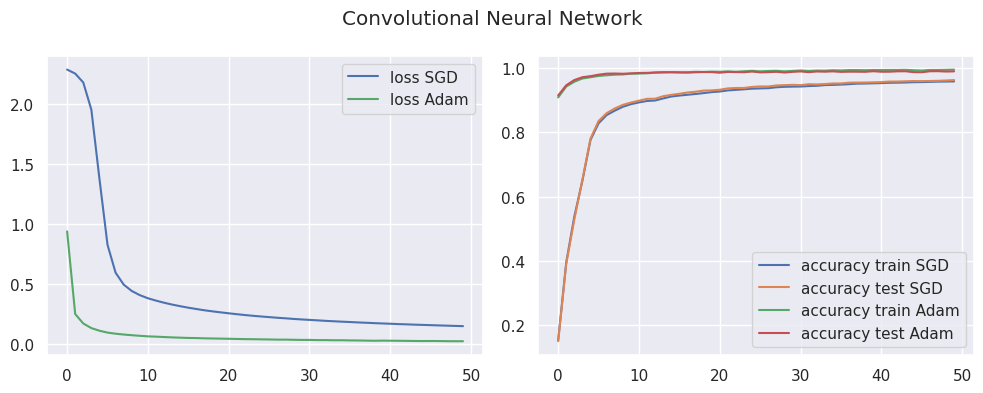

In [71]:
plot_SGD_Adam(result["cnn"], "Convolutional Neural Network")

In [72]:
scores_test = model_cnn(x_test)
preds = scores_test.max(axis=1).indices.flatten()
correct = preds == y_test
num_uncorrect = torch.logical_not(correct).sum().item()
print("nombre d'exemples mal classés:", num_uncorrect)

nombre d'exemples mal classés: 111


## Changement de dataset: FashionMNIST

## Annexe

### Utilisation du `DataLoader`

Le `DataLoader` de `PyTorch` est une classe utilitaire qui facilite le chargement et la gestion des données d'entraînement et de test dans les modèles d'apprentissage automatique. Il offre plusieurs avantages et fonctionnalités qui simplifient le processus de préparation des données et d'itération sur les batchs (mini-lots) lors de l'entraînement des modèles. 

On reprend le jeu de données MNIST.
- Créer un `DataLoader` en spécifiant le jeu de données `mnist_train` comme argument, avec un `batch_size` de 64 pour regrouper les données en mini-lots de taille 64, et avec l'option `shuffle=True` pour mélanger aléatoirement les données à chaque epoch (après un passage complet sur l'ensemble du dataset).
- Faire une boucle sur cet objet `DataLoader` pour le manipuler.
- Que représente une itération complète sur cet objet, et combien d'images est dans le dernier lot ? 

### Solution

In [76]:
from torchvision.transforms import ToTensor
mnist_train = datasets.MNIST('data', train=True, download=True, transform=ToTensor())
mnist_test = datasets.MNIST('data', train=False, download=True, transform=ToTensor())

In [77]:
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=64, shuffle=True)

In [78]:
n = len(train_loader)

In [79]:
for k, (x_batch, label) in enumerate(train_loader): 
    if k in (0, 1, n-2, n-1):
        print("lot: ", k)
        print("nombre d'images: ", len(x_batch))
        print("forme images: ", x_batch.shape)
        print("nombre de labels: ", len(label))

lot:  0
nombre d'images:  64
forme images:  torch.Size([64, 1, 28, 28])
nombre de labels:  64
lot:  1
nombre d'images:  64
forme images:  torch.Size([64, 1, 28, 28])
nombre de labels:  64
lot:  936
nombre d'images:  64
forme images:  torch.Size([64, 1, 28, 28])
nombre de labels:  64
lot:  937
nombre d'images:  32
forme images:  torch.Size([32, 1, 28, 28])
nombre de labels:  32
